In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import itertools
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
np.set_printoptions(threshold=np.nan)

In [8]:
data = pd.read_csv("../Data/preprocessed_alcoholdata_mad_std.csv") 

data = data.drop(['Unnamed: 0.1'], axis=1)
data = data.drop(['Unnamed: 0'], axis=1)
data['Conditie'] = data['Conditie'].map({'norm': 0,  'bril': 1})
data

ValueError: labels ['Unnamed: 0.1'] not contained in axis

In [3]:
sidlist = data['SubjectID'].unique()

#Make an array out of all rows for every unique SubjectID and list them together
grouped_data = [data[data['SubjectID']==sid] for sid in sidlist]


In [4]:
#Splits data into training and validation according to specified ratio
def validation_split(data, ratio):
    np.random.shuffle(data)
    N = len(data)
    training = data[:int(ratio*N)]
    validation = data[(int(ratio*N)):]
    return training,validation

# Converts the arrays in a list to one flattend dataframe
def flatten(data):
    return pd.DataFrame(np.vstack(data), columns=['TestID', 'Conditie', 'SubjectID','SegmentNr','WalkingDirection',        
 'SegmentData', 'Height', 'Weight', 'Age', 'BMI', 'std_SegmentData', 'Som_afstand', 'AverageStepLength'])

training,validation = validation_split(grouped_data, 0.7)
training = flatten(training)
validation = flatten(validation)


In [5]:
training_matrix = training.as_matrix()
X_train = np.array(training_matrix[:,[12, 11]], dtype=float)
y_train = np.array(training_matrix[:, 1], dtype=int)
validation_matrix = validation.as_matrix()
X_test = np.array(validation_matrix[:,[12, 11]], dtype=float)
y_test = np.array(validation_matrix[:, 1], dtype=int)

Logistic regression accuracy 0.8169642857142857
Confusion matrix, without normalization
[[93 19]
 [22 90]]
Normalized confusion matrix
[[0.83 0.17]
 [0.2  0.8 ]]


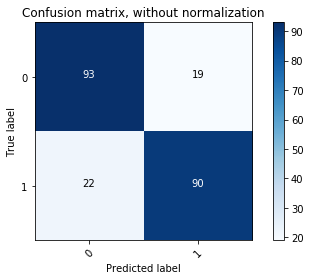

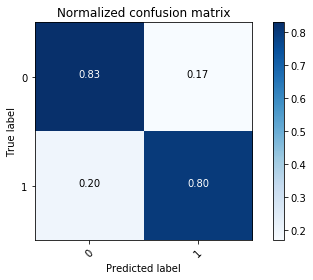

In [6]:
#Logistic regression accuracy

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', random_state=100000, max_iter=1000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# print(classification_report(y_test, y_pred))
print('Logistic regression accuracy', accuracy_score(y_test, y_pred))
class_names = ['0', '1']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Decision tree accuracy 0.7767857142857143
Confusion matrix, without normalization
[[91 21]
 [29 83]]
Normalized confusion matrix
[[0.81 0.19]
 [0.26 0.74]]


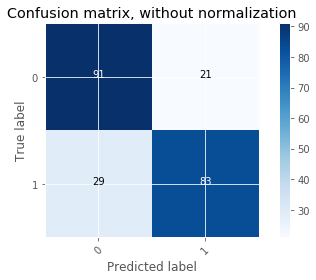

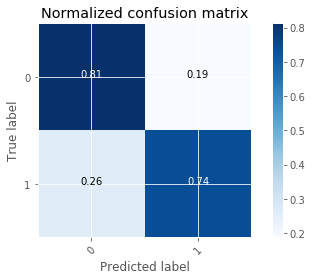

In [148]:
#Decision tree accuracy

clf = tree.DecisionTreeClassifier(random_state=100000)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# print(classification_report(y_test, y_pred))
print('Decision tree accuracy', accuracy_score(y_test, y_pred))

class_names = ['0', '1']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Bayes classifier accuracy 0.84375
Confusion matrix, without normalization
[[107   5]
 [ 30  82]]
Normalized confusion matrix
[[0.96 0.04]
 [0.27 0.73]]


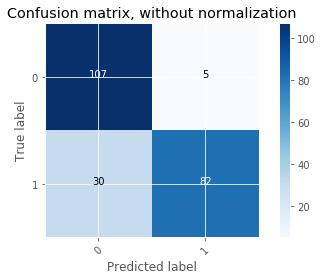

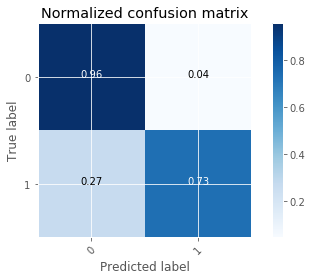

In [149]:
#Bayes classifier

gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
# print(classification_report(y_test, y_pred))
print('Bayes classifier accuracy', accuracy_score(y_test, y_pred))

# print(metrics.confusion_matrix(y_test, y_pred))

# # predictions = clf.predict(inputs)
# for input, prediction, label in zip(X_test, y_pred, y_test):
#     if prediction != label:
#         print(input, 'has been classified as ', prediction, 'and should be ', label) 

class_names = ['0', '1']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Neural network accuracy 0.8303571428571429
Confusion matrix, without normalization
[[101  11]
 [ 27  85]]
Normalized confusion matrix
[[0.9  0.1 ]
 [0.24 0.76]]


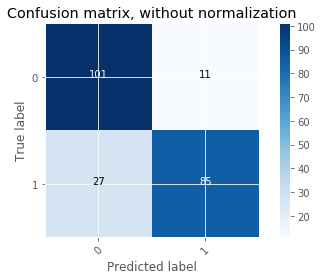

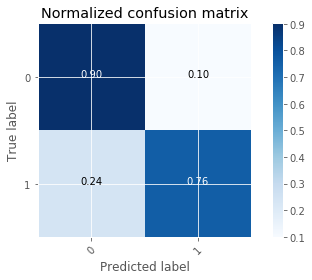

In [150]:
#Neural network

neu = MLPClassifier(random_state=100000, max_iter=1000)
neu = neu.fit(X_train, y_train)  
y_pred = neu.predict(X_test)
# print(classification_report(y_test, y_pred))
print('Neural network accuracy',accuracy_score(y_test, y_pred))
class_names = ['0', '1']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

SVM accuracy 0.8214285714285714
Confusion matrix, without normalization
[[101  11]
 [ 29  83]]
Normalized confusion matrix
[[0.9  0.1 ]
 [0.26 0.74]]


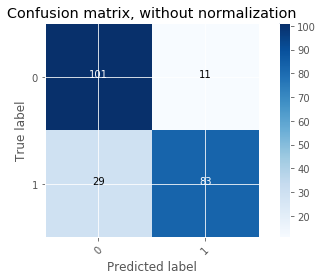

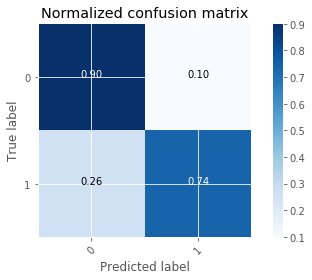

In [152]:
#SVM
cl = SVC(gamma='auto', class_weight='balanced', max_iter=100000)
cl.fit(X_train, y_train) 

y_pred = cl.predict(X_test)

# print(classification_report(y_test, y_pred))
print('SVM accuracy',accuracy_score(y_test, y_pred.round()))
class_names = ['0', '1']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

K-NN accuracy 0.8571428571428571
Confusion matrix, without normalization
[[102  10]
 [ 22  90]]
Normalized confusion matrix
[[0.91 0.09]
 [0.2  0.8 ]]


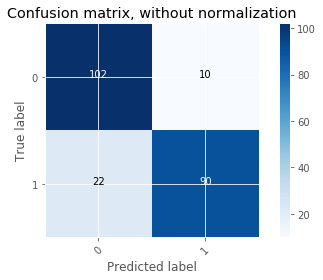

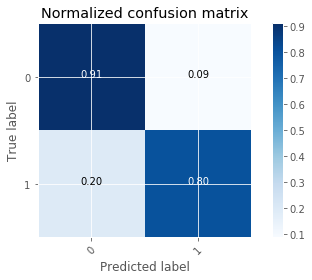

In [154]:
#K-NN

neigh = KNeighborsClassifier(n_neighbors=5)
neigh = neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)

# print(classification_report(y_test, y_pred))
print('K-NN accuracy',accuracy_score(y_test, y_pred.round()))

class_names = ['0', '1']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()